In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Load grayscale images
lena = cv2.imread("lena.jpg", cv2.IMREAD_GRAYSCALE).astype(np.float32)
baboon = cv2.imread("baboon.jpg", cv2.IMREAD_GRAYSCALE).astype(np.float32)

In [21]:
# Compute 2D DCT of both images
lena_dct = cv2.dct(lena)
baboon_dct = cv2.dct(baboon)


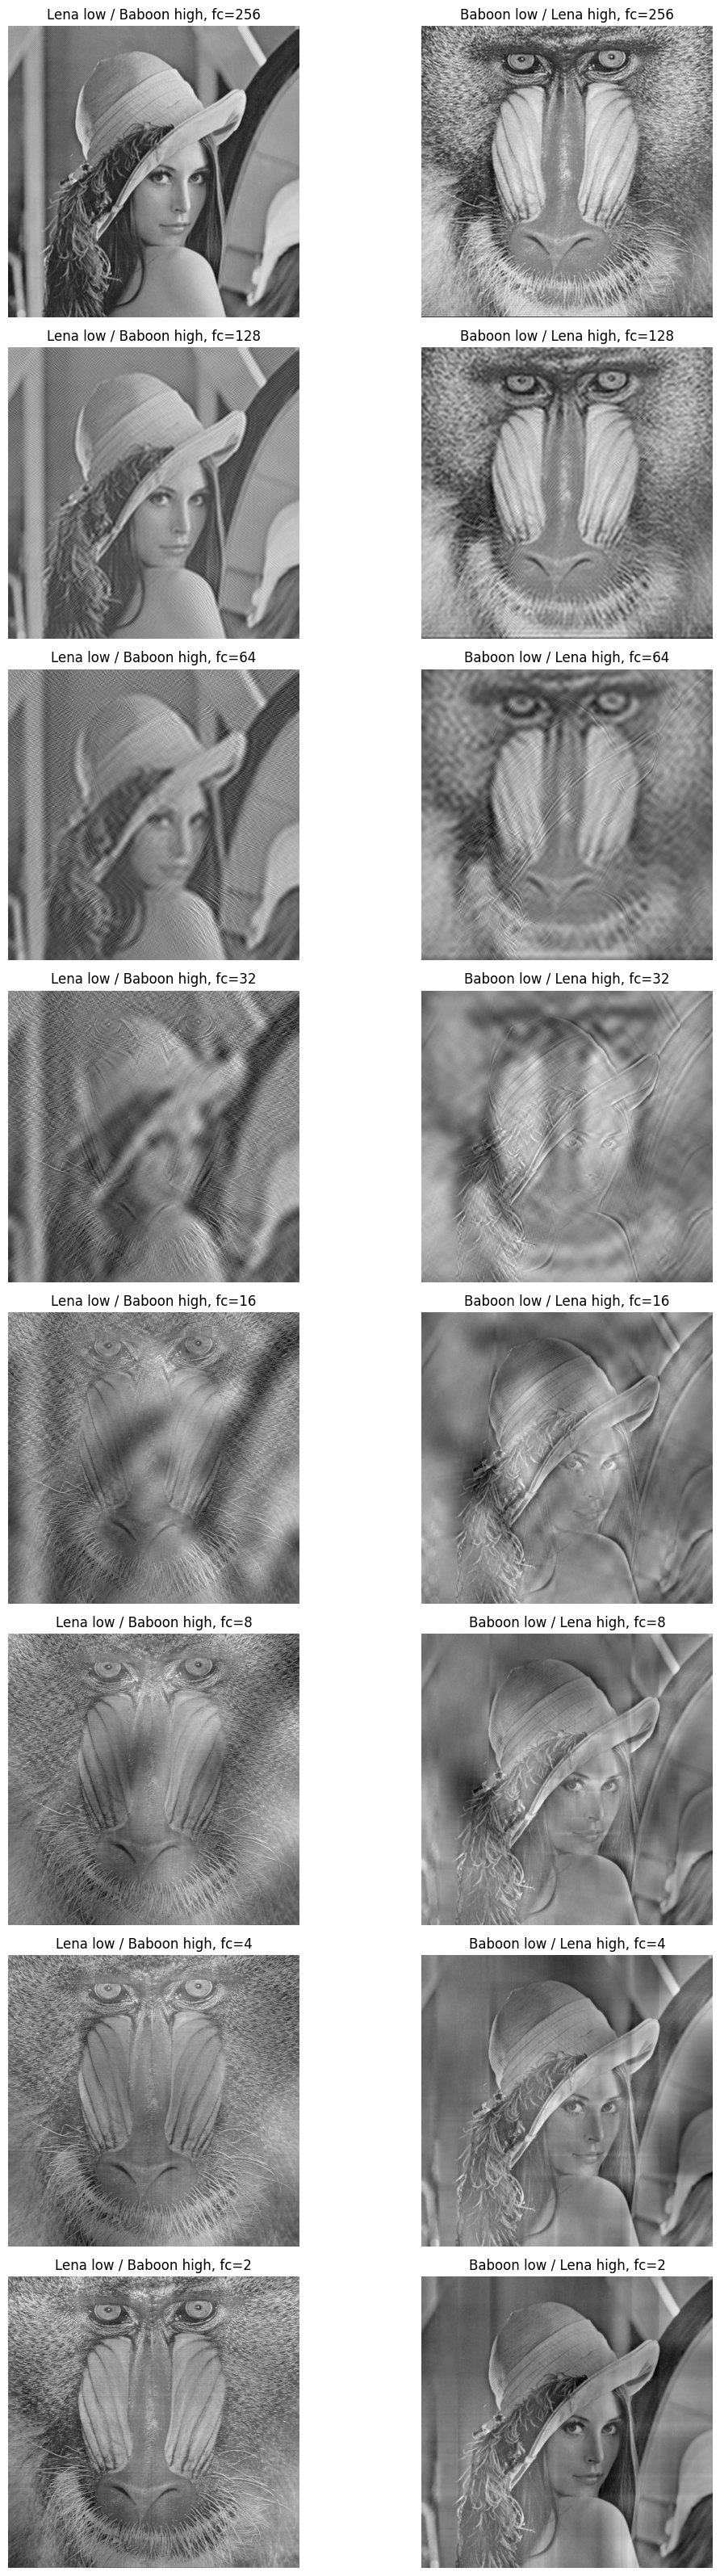

In [26]:
fc_list = [256, 128, 64, 32, 16, 8, 4, 2]
# Prepare figure
plt.figure(figsize=(12, 4 * len(fc_list)))  # height scales with number of fc

for i, fc in enumerate(fc_list):
    # Mixed frequency images
    lena_baboon_dct = np.zeros_like(lena_dct)
    baboon_lena_dct = np.zeros_like(lena_dct)
    
    # Lower frequencies from Lena, higher from Baboon
    lena_baboon_dct[:fc, :fc] = lena_dct[:fc, :fc]
    lena_baboon_dct[fc:, fc:] = baboon_dct[fc:, fc:]
    
    # Lower frequencies from Baboon, higher from Lena
    baboon_lena_dct[:fc, :fc] = baboon_dct[:fc, :fc]
    baboon_lena_dct[fc:, fc:] = lena_dct[fc:, fc:]
    
    # Inverse DCT
    lena_baboon = cv2.idct(lena_baboon_dct)
    baboon_lena = cv2.idct(baboon_lena_dct)
    
    # Plot side by side for each fc
    plt.subplot(len(fc_list), 2, 2*i + 1)
    plt.imshow(lena_baboon, cmap='gray')
    plt.title(f'Lena low / Baboon high, fc={fc}')
    plt.axis('off')
    
    plt.subplot(len(fc_list), 2, 2*i + 2)
    plt.imshow(baboon_lena, cmap='gray')
    plt.title(f'Baboon low / Lena high, fc={fc}')
    plt.axis('off')

plt.tight_layout()
plt.show()